In [2]:
import numpy as np
import matplotlib.pyplot as plt


# 1.	Sampling random numbers.

### a.	Sample Nc=100 random numbers from a uniform distribution (URNs). These are the random numbers generated by a rand() call. 

In [3]:
rand_100 = []
for value in range(100):
    rand = np.random.uniform()
    rand_100.append(rand)


In [4]:
print(rand_100)

[0.9662764802306448, 0.7041892764254383, 0.1176919889010164, 0.6297611464218262, 0.04576572858484196, 0.725374267326409, 0.351167471216858, 0.8776130160214548, 0.6875951961439288, 0.48135611152156765, 0.8912725063085419, 0.7653123343372098, 0.9939372939292974, 0.950924369603882, 0.9091668439751683, 0.07036709103316896, 0.2861873286862914, 0.010663039131832974, 0.9220485098916887, 0.5589427809287554, 0.05628888756014294, 0.6899123262205515, 0.7534113229771837, 0.9383552822862241, 0.030834586492928362, 0.8012330495189697, 0.9271034492650755, 0.9588880715215099, 0.7536253364794709, 0.574316851408568, 0.35106570705576223, 0.19840731314569904, 0.630585684949261, 0.12868468117128995, 0.6146569157090669, 0.014126065204871696, 0.6267256116296533, 0.33415601263652395, 0.5277676192717361, 0.34430898609335414, 0.900851341459655, 0.07284018358738065, 0.28738137537619557, 0.35139837921765216, 0.8641401293166244, 0.9046507413110108, 0.7298742354373795, 0.765161790537013, 0.01977914012070081, 0.42010

### b.	Generate a histogram of the URNs. To normalize it, you need to take your histogram of counts (which sums up to Nc=100), and divide by Z=Nc*bin_size. Then when you sum over the probabilities*bin_size, you get back 1. The bin_size determines the resolution—if you use too many bins, it becomes quite a noisy distribution.

(array([11.,  8.,  8.,  5.,  5.,  9., 14., 15., 10., 15.]),
 array([0.01066304, 0.10957009, 0.20847715, 0.3073842 , 0.40629125,
        0.50519831, 0.60410536, 0.70301241, 0.80191947, 0.90082652,
        0.99973358]),
 <BarContainer object of 10 artists>)

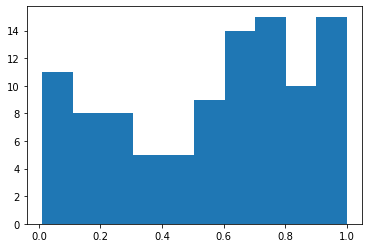

In [5]:
plt.hist(rand_100)

### c.	 Sample Nc=100000 random numbers. Generate a histogram of this—it should be much smoother. 


(array([ 9942., 10143., 10002.,  9963.,  9951., 10052.,  9946.,  9984.,
        10007., 10010.]),
 array([4.57458596e-05, 1.00040679e-01, 2.00035613e-01, 3.00030546e-01,
        4.00025480e-01, 5.00020413e-01, 6.00015347e-01, 7.00010280e-01,
        8.00005214e-01, 9.00000147e-01, 9.99995081e-01]),
 <BarContainer object of 10 artists>)

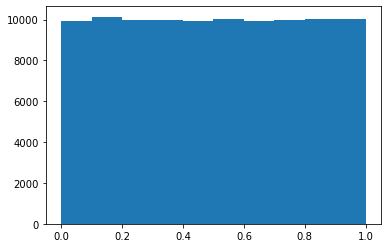

In [6]:
rand_100000 = []
for value in range(100000):
    rand = np.random.uniform()
    rand_100000.append(rand)
plt.hist(rand_100000)

### d.	Sample Nc=100000 random numbers from a Normal Distribution. Generate a histogram of these numbers and visualize it. 


(array([4.3000e+01, 6.5700e+02, 4.9320e+03, 1.8341e+04, 3.2757e+04,
        2.8476e+04, 1.2021e+04, 2.4840e+03, 2.7700e+02, 1.2000e+01]),
 array([-4.19305028, -3.31948934, -2.4459284 , -1.57236746, -0.69880652,
         0.17475442,  1.04831536,  1.9218763 ,  2.79543724,  3.66899818,
         4.54255912]),
 <BarContainer object of 10 artists>)

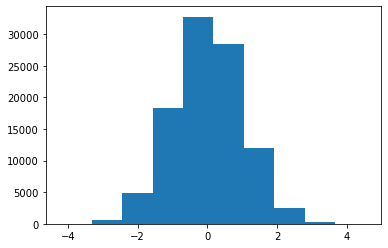

In [7]:
rand_100000_normal = []
for value in range(100000):
    rand = np.random.normal()
    rand_100000_normal.append(rand)
plt.hist(rand_100000_normal)

### e.	Sample Nc=100000 random numbers from a Normal Distribution with 𝜎 =3. Generate a histogram and visualize it, how does it compare with (d)? (e.g. randn()*3 is normally distributed with 𝜎 =3)


(array([6.0000e+00, 1.7800e+02, 2.4120e+03, 1.3586e+04, 3.2251e+04,
        3.3297e+04, 1.5086e+04, 2.9330e+03, 2.4000e+02, 1.1000e+01]),
 array([-14.30959477, -11.47205566,  -8.63451656,  -5.79697745,
         -2.95943834,  -0.12189923,   2.71563987,   5.55317898,
          8.39071809,  11.22825719,  14.0657963 ]),
 <BarContainer object of 10 artists>)

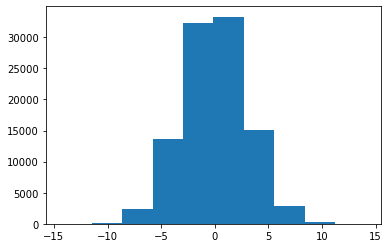

In [8]:
rand_100000_normal3 = []
for value in range(100000):
    rand = np.random.normal()*3
    rand_100000_normal3.append(rand)
plt.hist(rand_100000_normal3)

# the mean is still 0, but the spread is much wider!

# 2.	Simulate a 1D hopping process, characterize the mean displacement over N trajectories, and the mean squared displacement over N trajectories. 

### a.	Start your particle off at x=0. Use a lattice where a=1.

### b.	Perform a random hop based on the probabilities we discussed in class: with probability p_left=k*dt, p_right=k*dt, and p_stay=1-2k*dt. Try, e.g. k=1/s and dt=0.1s. 

In [9]:
x_start = 0
a = 1
dt = 0.1
k = 1
p_left = k*dt
p_right = k*dt
p_stay = 1-(2*(k*dt))
print(p_stay)

0.8


In [10]:
def one_hop(start, p_left, p_right, p_stay, a):
    rand = np.random.uniform()
    position = start
    if rand < p_left and rand > 0: #p_left:
        #go down
        position = (start - a)
    if rand > (1- p_right) and rand < 1: #(p_left + p_stay):
        #go up
        position = (start + a)
    if rand > p_left and rand < (1-p_right):
        position = start
    return(position)
print(one_hop(0, p_left, p_right, p_stay, a))

0


### c.	From your new position, perform a new random hop, this is a Markov process, so the next position only depends on your current position!

In [11]:
def two_hop(start, p_left, p_right, p_stay, a):
    rand = np.random.uniform()
    position = []
    if rand < p_left:
        #go down
        position.append(start - a)
    if rand > (p_left + p_stay):
        #go up
        position.append(start + a)
    else:
        position.append(start)
    return(position)
print(two_hop(one_hop, p_left, p_right, p_stay, a))

[<function one_hop at 0x7fb0e2da4d08>]


### d.	Take Nsteps=100steps. Save your position at 50 steps, and at 100 steps.

In [12]:
position_list = [0]
count = 0
for values in range(100):
    position_list.append(one_hop(position_list[count], p_left, p_right, p_stay, a))
    count +=1
    
print(position_list[50], position_list[100])
    
    
    


-5 -5


In [13]:
def multi_hop(steps):
    position_list = [0]
    count = 0
    for values in range(steps):
        position_list.append(one_hop(position_list[count], p_left, p_right, p_stay, a))
        count +=1
    return(position_list[50], position_list[100])
print(multi_hop(100))

(-3, 2)


### e.	This was 1 single stochastic trajectory. Now do this again, for N=1000 trajectories. You should now have 1000 values of the displacement at 50 steps and 100 steps recorded. Calculate the mean displacement. Calculate the mean squared displacement. What are they? What should they be?! 

In [14]:
master_list = []

for value in range(1000):
    master_list.append(multi_hop(100))

print(master_list)

[(-9, -19), (-3, -5), (6, 8), (-3, 0), (4, 2), (-6, 3), (-4, -1), (0, -3), (3, 4), (6, 5), (4, 2), (3, 7), (-5, -2), (0, 4), (-4, 0), (6, 8), (2, -1), (-2, -6), (1, 4), (3, 0), (-2, 3), (-1, -6), (2, 3), (2, 4), (0, -3), (-8, -6), (0, 4), (-6, -10), (1, 7), (-5, -4), (2, 3), (-4, -6), (1, -1), (-2, -5), (5, 4), (5, 2), (-1, 3), (-7, -4), (1, 5), (2, 2), (-1, -2), (-3, -6), (-3, 0), (4, -1), (-2, -4), (-1, 2), (-4, 0), (-4, -2), (0, -1), (-5, 0), (6, 4), (7, 10), (-5, -2), (-3, -4), (-2, -1), (-1, 2), (-2, -7), (3, 4), (-1, 4), (0, 1), (-2, -2), (4, 12), (-4, 1), (1, 1), (0, -3), (-5, -1), (1, -3), (0, 2), (-7, -1), (0, 0), (1, 7), (1, -1), (-2, -4), (-5, -5), (-1, 4), (1, -1), (0, -2), (-1, 5), (3, 0), (4, 4), (2, 4), (2, 3), (-2, -6), (-1, 2), (11, 15), (1, 5), (1, 3), (-3, -1), (3, -2), (-2, -3), (3, 12), (2, 3), (0, 3), (2, 9), (-7, -8), (6, 7), (-3, 0), (-9, -13), (5, 5), (1, 8), (0, -2), (0, -5), (-3, -4), (-1, 7), (3, 4), (-1, -2), (-4, -4), (0, 3), (5, 5), (0, 2), (-4, -2), (0, 

In [15]:
print(len(master_list))

1000


In [16]:
master_list_2 = []
for value in master_list:
    master_list_2.append(value[0])
    master_list_2.append(value[1])
    
print(master_list_2)

[-9, -19, -3, -5, 6, 8, -3, 0, 4, 2, -6, 3, -4, -1, 0, -3, 3, 4, 6, 5, 4, 2, 3, 7, -5, -2, 0, 4, -4, 0, 6, 8, 2, -1, -2, -6, 1, 4, 3, 0, -2, 3, -1, -6, 2, 3, 2, 4, 0, -3, -8, -6, 0, 4, -6, -10, 1, 7, -5, -4, 2, 3, -4, -6, 1, -1, -2, -5, 5, 4, 5, 2, -1, 3, -7, -4, 1, 5, 2, 2, -1, -2, -3, -6, -3, 0, 4, -1, -2, -4, -1, 2, -4, 0, -4, -2, 0, -1, -5, 0, 6, 4, 7, 10, -5, -2, -3, -4, -2, -1, -1, 2, -2, -7, 3, 4, -1, 4, 0, 1, -2, -2, 4, 12, -4, 1, 1, 1, 0, -3, -5, -1, 1, -3, 0, 2, -7, -1, 0, 0, 1, 7, 1, -1, -2, -4, -5, -5, -1, 4, 1, -1, 0, -2, -1, 5, 3, 0, 4, 4, 2, 4, 2, 3, -2, -6, -1, 2, 11, 15, 1, 5, 1, 3, -3, -1, 3, -2, -2, -3, 3, 12, 2, 3, 0, 3, 2, 9, -7, -8, 6, 7, -3, 0, -9, -13, 5, 5, 1, 8, 0, -2, 0, -5, -3, -4, -1, 7, 3, 4, -1, -2, -4, -4, 0, 3, 5, 5, 0, 2, -4, -2, 0, 3, 0, 5, 6, 13, 2, -6, 2, 1, 1, 8, -7, -4, 7, 13, -2, -2, -2, -3, 3, 0, -1, 2, 0, 0, 0, -2, -4, -2, -1, -1, 4, 3, -1, -4, 0, -2, 3, -1, 2, -1, -3, 0, 3, 1, 2, 7, 0, -3, 2, 1, 4, 7, 3, 5, -1, -6, -5, -7, 3, 5, 0, -5, 4, 0, 2

In [20]:
sum = 0
for value in master_list_2:
    sum += value
mean = sum / len(master_list_2)
print(mean)

0.184


In [26]:
sum_for_var = 0
for value in master_list_2:
    temp = (value - 0.184)*(value-0.184)
    sum_for_var += temp
    var = sum_for_var/100
print(var)

305.78287999999816


In [ ]:
# the mean is 0.184, when it should be 0, and the variance is 306 when it should be 200. 

### f.	If you perform more trajectories, you will get better statistics. 

### g.	What happens if you increase k from 1 to 4? (Note if you make k too high, you will have to decrease dt, meaning you have to take smaller steps to resolve the process properly because it is faster now!). 

In [32]:
k = 4
dt = 0.01
p_left_1 = k*dt
p_right_1 = k*dt
p_stay_1 = 1-(2*(k*dt))
print(p_stay)

def multi_hop_2(steps):
    position_list = [0]
    count = 0
    for values in range(steps):
        position_list.append(one_hop(position_list[count], p_left_1, p_right_1, p_stay_1, a))
        count +=1
    return(position_list[50], position_list[100])
print(multi_hop_2(100))

0.92
(-1, 0)


In [33]:

master_list_newk = []

for value in range(1000):
    master_list_newk.append(multi_hop_2(100))

print(master_list_newk)

[(-1, -4), (-4, -7), (3, 1), (-2, -4), (0, 1), (0, 1), (1, -2), (1, 0), (-1, -4), (-3, -5), (1, 1), (0, 0), (-3, 0), (0, 2), (0, -4), (2, 1), (-1, -1), (-5, -3), (1, 1), (1, 1), (-3, -4), (3, 4), (-3, -1), (5, 4), (0, 1), (0, 0), (0, 1), (1, 1), (0, 2), (3, 3), (0, 1), (3, 3), (1, 0), (1, 0), (-4, -5), (-2, -2), (0, 4), (-2, 0), (1, 3), (-1, 0), (-4, -4), (-2, -1), (0, 2), (1, 0), (0, -2), (0, 0), (1, 4), (0, 1), (5, 3), (7, 6), (0, -1), (0, 2), (-1, 0), (0, -1), (3, 2), (1, 4), (1, 4), (-1, -2), (2, 3), (1, 1), (1, 4), (2, 3), (-2, -2), (-2, 2), (0, 0), (1, -1), (0, 0), (0, -1), (-1, -2), (0, -2), (-3, -5), (-2, -6), (2, 0), (1, 2), (-1, -3), (-3, -1), (-3, -6), (2, 3), (-4, -1), (-2, -4), (2, 5), (2, 0), (2, 2), (-1, -1), (-3, -6), (-1, -1), (0, 0), (-2, -5), (-6, -5), (-6, -9), (-2, -3), (2, 2), (0, 3), (3, 3), (-1, 0), (0, -4), (2, 3), (-3, -3), (-1, -1), (-3, -8), (-2, -1), (-1, -1), (-2, -4), (0, -3), (2, -2), (1, 1), (-1, -3), (-4, -4), (-3, -8), (4, 5), (1, -2), (-5, 0), (-2, 1

In [34]:
master_list_newk_2 = []
for value in master_list:
    master_list_newk_2.append(value[0])
    master_list_newk_2.append(value[1])
    

sum = 0
for value in master_list_newk_2:
    sum += value
mean = sum / len(master_list_newk_2)
print(mean)

0.184


In [36]:
sum_for_var_2 = 0
for value in master_list_newk_2:
    temp = (value - 0.184)*(value-0.184)
    sum_for_var_2 += temp
    var_2 = sum_for_var_2/1000
print(var_2)

30.57828799999982


In [ ]:
#The mean remains the same, but the variance decreases.

### h.	What happens if p_left is not equal to p_right?

In [ ]:
# drift! when p_right is greater, the mean also skews to the right. 